# The dataset gives us Amazon sales report data.

# The dataset is available at https://www.kaggle.com/code/kartikmanekar007/e-commerce-sales-dataset/input

# Importing the libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [14]:
ggsheet_id="19hDQKF3Tn-SsizIOyzfM5dYukbQemqaeBkFBwQaVGos"
url="https://docs.google.com/spreadsheets/d/{0}/export?format=xlsx".format(ggsheet_id)
df=pd.read_excel(url)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [16]:
df['Date'].head()

,Date
0,04-30-22
1,04-30-22
2,04-30-22
3,04-30-22
4,04-30-22


In [17]:
for col in df.columns:
    if df[col].dtype == ('Category','Size','Status','Fulfilment','Style','SKU','ASIN','Courier status','Currency'):
        df[col] = df[col].astype(str)



In [18]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].dtype


/tmp/ipython-input-990000184.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


dtype('<M8[ns]')

In [19]:
df.duplicated('Order ID').sum()


np.int64(8597)

In [20]:
df = df.drop_duplicates('Order ID')


In [21]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code,Unnamed: 22
count,120378.000000,120378,120378.000000,112977.000000,120350.000000,74538.0
mean,64439.750528,2022-05-29 09:04:42.968648704,0.903604,649.782712,463569.890893,0.0
min,0.000000,2022-01-04 00:00:00,0.000000,0.000000,110001.000000,0.0
25%,32202.250000,2022-04-20 00:00:00,1.000000,449.000000,382007.000000,0.0
50%,64409.500000,2022-05-21 00:00:00,1.000000,612.000000,500032.000000,0.0
75%,96692.750000,2022-06-24 00:00:00,1.000000,788.000000,600024.000000,0.0
max,128974.000000,2022-12-06 00:00:00,15.000000,5495.000000,989898.000000,0.0
std,37245.046959,NaN,0.313003,281.434404,192185.263912,0.0


In [22]:
df.isnull().sum()


,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [23]:
df.duplicated().sum()


np.int64(0)

In [24]:
df.fillna({'ship-postal-code': 0}, inplace=True)


In [25]:
df['Amount'] = df['Amount'].fillna(0)


In [26]:
df.drop(columns=['Unnamed: 22'], inplace=True)


In [27]:
df['currency'] = df['currency'].fillna(df['currency'].mode()[0])


In [28]:
df.fillna({
    'ship-city': 'Unknown',
    'ship-state': 'Unknown',
    'ship-country': 'Unknown',
    'ship-postal-code': 0
}, inplace=True)

In [29]:
df['Courier Status'] = df['Courier Status'].fillna('Pending')
df.fillna({
    'promotion-ids': 'None',
    'fulfilled-by': 'Not Specified'
}, inplace=True)
df.isnull().sum()



,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [31]:
original_df = pd.read_csv("Amazon Sale Report.csv", dtype={'Unnamed: 22': str})
df['Date_raw'] = original_df['Date']
df['Date'] = pd.to_datetime(original_df['Date'], format='%d/%m/%Y', errors='coerce')



FileNotFoundError: [Errno 2] No such file or directory: 'Amazon Sale Report.csv'

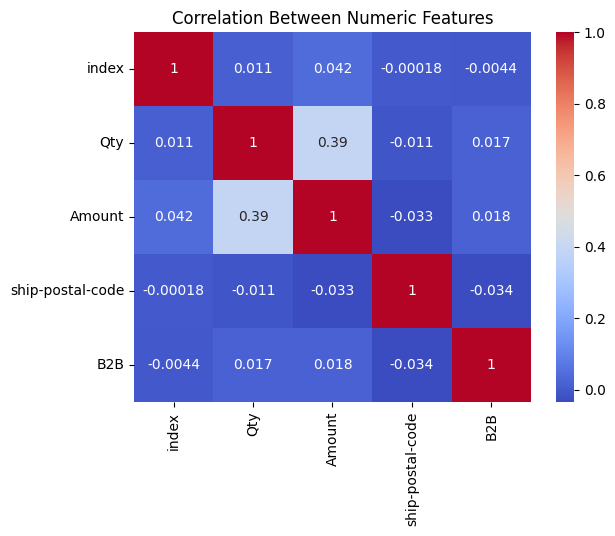

In [32]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

In [33]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


In [34]:
df['year_month'] = pd.to_datetime(df['Date']).dt.to_period('M')
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
monthly_sales



,Date,Amount
0,2022-01,2664533.92
1,2022-02,2769684.09
2,2022-03,2850831.45
3,2022-04,19158166.30
4,2022-05,16640390.26
5,2022-06,14259366.71
6,2022-07,2581336.78
7,2022-08,2701835.41
8,2022-09,2559965.86
9,2022-10,2443394.76


In [35]:
totalSum =df.groupby([
                       pd.to_datetime(df['Date']).dt.month,
                       'Category']).agg({'Amount': sum})
totalSum

/tmp/ipython-input-4023646296.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  'Category']).agg({'Amount': sum})


Amount
Date Category                 
1    Blouse           16544.29
     Bottom            2925.10
     Ethnic Dress     36112.06
     Saree             2037.00
     Set            1330975.08
...                        ...
12   Saree             3865.90
     Set            1169013.49
     Top             197647.56
     Western Dress   361389.10
     kurta           602967.82

[97 rows x 1 columns]

In [36]:
df = df.dropna(subset=['B2B', 'Amount'])
segment_sales = df.groupby('B2B')['Amount'].sum().reset_index()
segment_sales

,B2B,Amount
0,False,72870011.67
1,True,540489.73


result: True show B2B business amount reach 591220.79
and another is B2C with amount at 78001457.51
=> it depict that AMZ sales performance base on  B2C

In [37]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,year_month
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,None,False,Easy Ship,2022-04
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022-04
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Not Specified,2022-04
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,None,False,Easy Ship,2022-04
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,None,False,Not Specified,2022-04


In [38]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].astype(float)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [45]:
df['date_as_int'] = df['Date'].astype('int64')

In [47]:
df.astype("float").head()

TypeError: Cannot cast PeriodArray to dtype float64

In [48]:
X = df[[col for col in df.columns if col != "Amount"]]
y = df['Amount']
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float)).fit()
print(model.summary())

TypeError: Cannot cast PeriodArray to dtype float64